# **Python für Ingenieure**
<!-- Lizensiert unter (CC BY 4.0) Gert Herold, 2022 -->

## 8.2. Dynamische und interaktive Plot-Beispiele

Um einen Plot dynamisch anpassen zu können, muss das Paket *ipympl* in die Anaconda-Umgebung installiert werden, falls es noch nicht vorhanden ist:
```shell
    conda install ipympl
```

Für interaktive Plots wird das Modul [*ipywidgets*](https://ipywidgets.readthedocs.io/en/latest/) verwendet.
Überprüfen Sie (z.B: über `conda list`), ob das Modul bereits vorhanden ist und falls nicht, [installieren Sie es nach.](https://ipywidgets.readthedocs.io/en/latest/user_install.html#with-conda)
Dieses Modul stellt Steuer- und Plot-Elemente ("widget", dt.: "Dings") zur Verfügung, die auch im JupyterLab verwendet werden können.

Möglicherweise muss zuvor noch node.js installiert werden:
```shell
    conda install nodejs
```

### 8.2.1. Dynamische Plots

Für dynamischen Plot Skript einleiten mit 
```python 
    %matplotlib widget
```

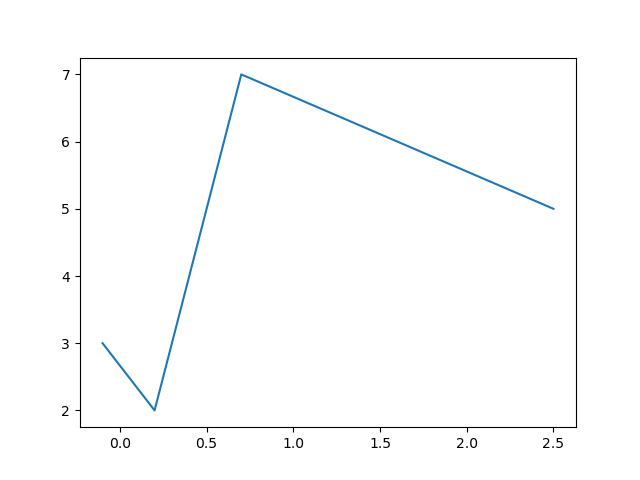

In [3]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

x = [-0.1,0.2,0.7,2.5]
y = [3,2,7,5]

plt.plot(x, y)
plt.show()

### 8.2.2. Interaktive Steuerelemente und Plots

In [4]:
import ipywidgets as widgets

def f(x):
    return x**2

widgets.interact(f, x=10);


interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

**Beispiel: Funktionsplot mit Parametern**

In [5]:
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

@widgets.interact
def plot_signal(f=(1,100),tmax=(0.1,1,0.01), tone_amp = (0.0,2,0.1), noise_amp = (0.0,2,0.1)):
    
    plt.figure(2,(15,5))
    t = np.linspace(0,tmax,1000)
    p = np.sin(2*np.pi*f*t)*tone_amp
    noise = np.random.randn(1000)*noise_amp
    
    #fs = 1/(t[1]-t[0])
    #print(f'Abtastfrequenz: {fs:.2f} Hz')
    
    plt.plot(t,p+noise)
    plt.grid(True)
    plt.xlabel('$t$ / s')
    plt.ylabel('$p$ / Pa')
    plt.show()


interactive(children=(IntSlider(value=50, description='f', min=1), FloatSlider(value=0.55, description='tmax',…

Feste Höhe für Plot reservieren (ggf. "Flackern" durch veränderliche Plothöhe verhindern):

In [6]:
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

def plot_signal(f, tmax, tone_amp, noise_amp):
    
    plt.figure(2,(15,5))
    t = np.linspace(0,tmax,1000)
    p = np.sin(2*np.pi*f*t)*tone_amp
    noise = np.random.randn(1000)*noise_amp
    
    plt.plot(t,p+noise)
    plt.grid(True)
    plt.xlabel('$t$ / s')
    plt.ylabel('$p$ / Pa')
    plt.show()
    
grafik = widgets.interactive(plot_signal, f=(1,100),tmax=(0.1,1,0.01), tone_amp = (0.0,2,0.1), noise_amp = (0.0,2,0.1))
ausgabefenster = grafik.children[-1]
ausgabefenster.layout.height = '5in'
grafik

interactive(children=(IntSlider(value=50, description='f', min=1), FloatSlider(value=0.55, description='tmax',…

Aktuelle Parameter ausgeben / weiterverwenden:

In [7]:
for param in grafik.children[0:-1]:
    print(param.description,':',param.value)

f : 50
tmax : 0.55
tone_amp : 1.0
noise_amp : 1.0


Dokumentation weiterer Widget-Einstellungen: https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html

In [7]:
%matplotlib inline
import ipywidgets as widgets
import matplotlib.pyplot as plt
from glob import glob


impath = '../HA3 Expert/img/'
flist = glob(impath+'*.*')

@widgets.interact
def zeig_bild(dateiname=flist):
    im = plt.imread(dateiname)
    plt.figure(3,(15,15))
    plt.imshow(im)
    plt.axis('off')
    plt.show()


interactive(children=(Dropdown(description='dateiname', options=('../HA3 Expert/img\\A001_1.tif', '../HA3 Expe…